# Naive Bayes

Berikut langkah-langkah membandingkan akurasi Naive Bayes pada data IRIS dengan dan tanpa outlier:

## 1. Load Dataset Iris

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.shape)

(150, 5)


## 2. Deteksi Outlier

Deteksi outlier menggunakan LOF:

In [2]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
outlier_pred = lof.fit_predict(df.iloc[:, :-1]) #Nilai outlier = -1 artinya outlier, 1 artinya bukan outlier
df['outlier'] = outlier_pred
print(df['outlier'].value_counts())
df[df['outlier'] == -1] #Menampilkan data outlier

outlier
 1    144
-1      6
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,outlier
15,5.7,4.4,1.5,0.4,0,-1
41,4.5,2.3,1.3,0.3,0,-1
98,5.1,2.5,3.0,1.1,1,-1
117,7.7,3.8,6.7,2.2,2,-1
118,7.7,2.6,6.9,2.3,2,-1
131,7.9,3.8,6.4,2.0,2,-1


## 3. Pisahkan Dataset


*   Dengan outlier (original)
*   Tanpa outlier



In [3]:
df_with_outlier = df.drop(columns=['outlier'])
df_no_outlier = df[df['outlier'] == 1].drop(columns=['outlier'])
print("Data dengan outlier:", df_with_outlier.shape)
print("Data tanpa outlier :", df_no_outlier.shape)

Data dengan outlier: (150, 5)
Data tanpa outlier : (144, 5)


## 4. Model Naive Baiyes

Menggunakan **GaussianNB** dari scikit-learn:

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Model dengan outlier:**

In [5]:
X1 = df_with_outlier.drop(columns=['target'])
y1 = df_with_outlier['target']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42) #Persiapan data

model1 = GaussianNB() #Inisialisasi model
model1.fit(X1_train, y1_train) #Latih Model
y1_pred = model1.predict(X1_test) #Prediksi

#Evaluasi
acc_with_outlier = accuracy_score(y1_test, y1_pred)
print("Akurasi dengan outlier:", acc_with_outlier)

Akurasi dengan outlier: 1.0


**Model tanpa outlier:**

In [6]:
X2 = df_no_outlier.drop(columns=['target'])
y2 = df_no_outlier['target']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = GaussianNB()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

acc_no_outlier = accuracy_score(y2_test, y2_pred)
print("Akurasi tanpa outlier:", acc_no_outlier)

Akurasi tanpa outlier: 1.0


Berikut adalah visualisasi perbandingan akurasi Naive Bayes pada data IRIS dengan dan tanpa outlier menggunakan matplotlib.

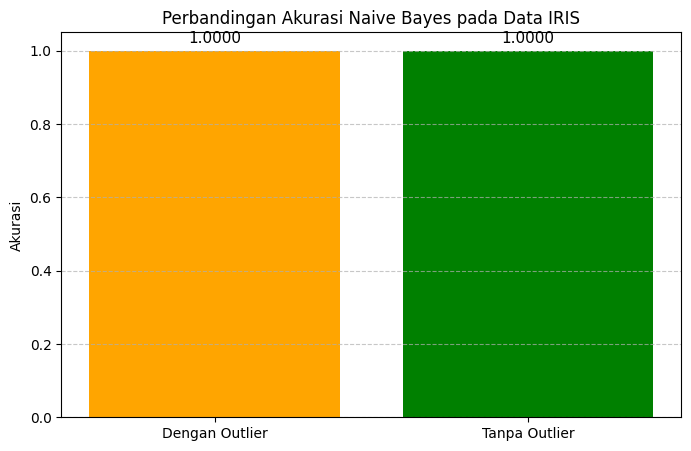

In [7]:
import matplotlib.pyplot as plt

# Misalnya hasil akurasi dari sebelumnya
akurasi_dengan_outlier = acc_with_outlier  # contoh: 1.0
akurasi_tanpa_outlier = acc_no_outlier   # contoh: 0.9583

# Data untuk visualisasi
labels = ['Dengan Outlier', 'Tanpa Outlier']
akurasi = [akurasi_dengan_outlier, akurasi_tanpa_outlier]
warna = ['orange', 'green']

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(labels, akurasi, color=warna)
plt.ylim(0, 1.05)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Naive Bayes pada Data IRIS')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai akurasi di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', fontsize=11)

plt.show()


## 5. Visualisasi Outlier

Berikut adalah grafik visualisasi outlier dari dataset IRIS menggunakan LOF. Visualisasi data dalam dua dimensi menggunakan **PCA** agar lebih mudah lihat, lalu membedakan warnanya.

Outlier indices: [15, 41, 98, 117, 118, 131]


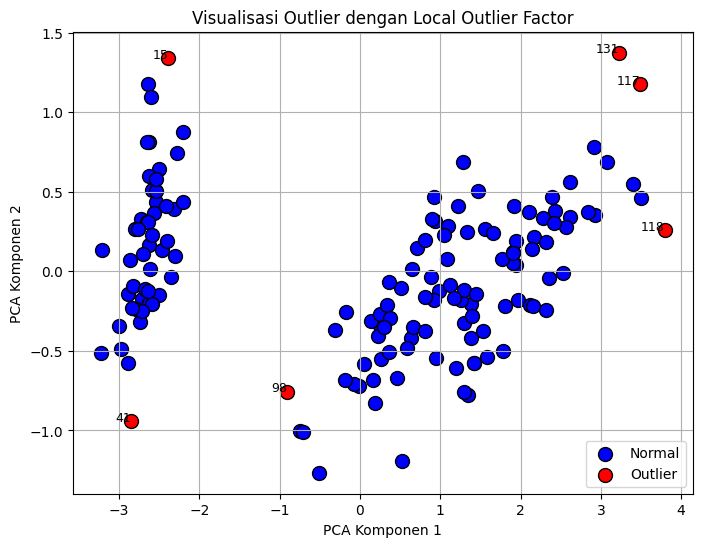

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ambil hanya fitur (tanpa target dan outlier label)
features = df.drop(columns=['target', 'outlier'])

# Reduksi dimensi ke 2D dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Plot hasil PCA dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))

# Pisahkan titik normal dan outlier
normal_points = df[df['outlier'] == 1]
outlier_points = df[df['outlier'] == -1]

# Plot titik normal (warna biru)
plt.scatter(X_pca[normal_points.index, 0], X_pca[normal_points.index, 1], c='blue', edgecolor='k', s=100, label='Normal')

# Plot titik outlier (warna merah)
plt.scatter(X_pca[outlier_points.index, 0], X_pca[outlier_points.index, 1], c='red', edgecolor='k', s=100, label='Outlier')

# Menambahkan label untuk outlier saja
for i, label in enumerate(df['outlier']):
    if label == -1:  # Hanya menambahkan label pada outlier
        plt.text(X_pca[i, 0], X_pca[i, 1], str(i), fontsize=9, ha='right', color='black')

# Tampilkan semua titik outlier dalam plot
outlier_indices = df[df['outlier'] == -1].index
print(f'Outlier indices: {outlier_indices.tolist()}')

plt.title('Visualisasi Outlier dengan Local Outlier Factor')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.grid(True)

# Menambahkan legenda
plt.legend(loc='lower right')

# Tampilkan plot
plt.show()
